# Naive Forecasting 

In [20]:
#imports the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load the dataset to inspect its structure
file_path = '../data/air-passengers.csv'
data = pd.read_csv(file_path)


# Display the last few rows to understand the data
data.tail(12)

,Month,Passengers
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


# Plot data with train/test split 

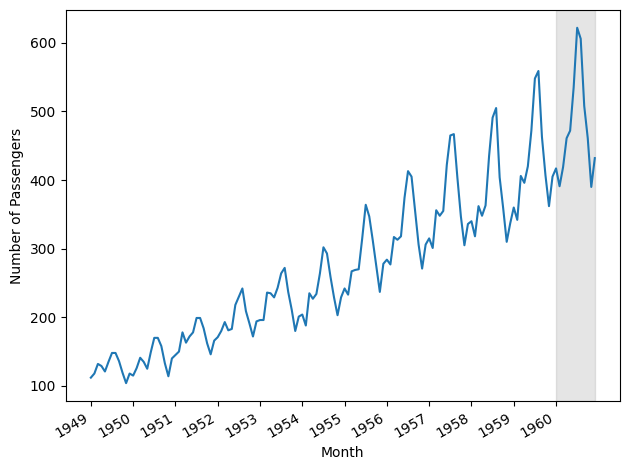

In [22]:
fig, ax = plt.subplots()
ax.plot(data['Month'], data['Passengers'])
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan(132,143, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 144, 12), [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('020 - Naive Forecasting - image 010.png', dpi=300)

# Split Dataset to train & test

In [23]:
train = data[:-12]
test = data[-12:]

In [24]:
historical_mean = np.mean(train['Passengers'])
historical_mean

np.float64(262.49242424242425)

In [25]:
# calculate the mean absolute percentage error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# calculate the root mean squared error
def rsme(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


### 1. Naive prediction using historical mean

In [26]:
test.loc[:, 'pred_mean'] = historical_mean
test

C:\Users\FAH\AppData\Local\Temp\ipykernel_29892\2391431290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


,Month,Passengers,pred_mean
132,1960-01,417,262.492424
133,1960-02,391,262.492424
134,1960-03,419,262.492424
135,1960-04,461,262.492424
136,1960-05,472,262.492424
137,1960-06,535,262.492424
138,1960-07,622,262.492424
139,1960-08,606,262.492424
140,1960-09,508,262.492424
141,1960-10,461,262.492424


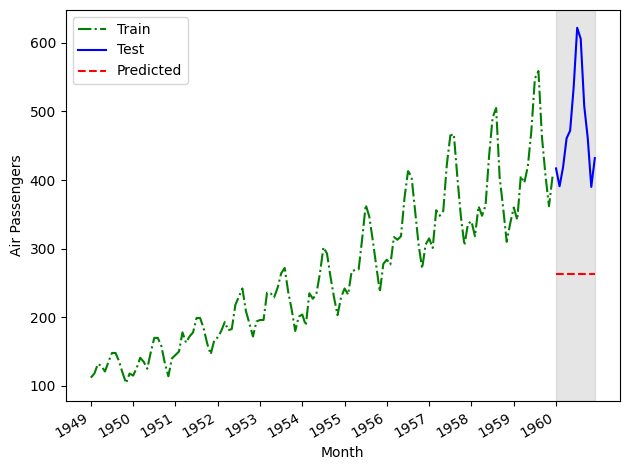

In [27]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Air Passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 144, 12), [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('020 - Naive Forecasting - image 020.png', dpi=300)

In [28]:
print("Mape: " + str(mape(test['Passengers'], test['pred_mean'])))
print("Rsme: " + str(rsme(test['Passengers'], test['pred_mean'])))

Mape: 43.62152220711003
Rsme: 226.26567149657532


### 2. Naive prediction using last years's mean

In [29]:
last_year_mean = np.mean(train['Passengers'][-12:])
last_year_mean

np.float64(428.3333333333333)

In [30]:
test.loc[:, 'pred_last_yr_mean'] = last_year_mean
test

C:\Users\FAH\AppData\Local\Temp\ipykernel_29892\15714479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_yr_mean'] = last_year_mean


,Month,Passengers,pred_mean,pred_last_yr_mean
132,1960-01,417,262.492424,428.333333
133,1960-02,391,262.492424,428.333333
134,1960-03,419,262.492424,428.333333
135,1960-04,461,262.492424,428.333333
136,1960-05,472,262.492424,428.333333
137,1960-06,535,262.492424,428.333333
138,1960-07,622,262.492424,428.333333
139,1960-08,606,262.492424,428.333333
140,1960-09,508,262.492424,428.333333
141,1960-10,461,262.492424,428.333333


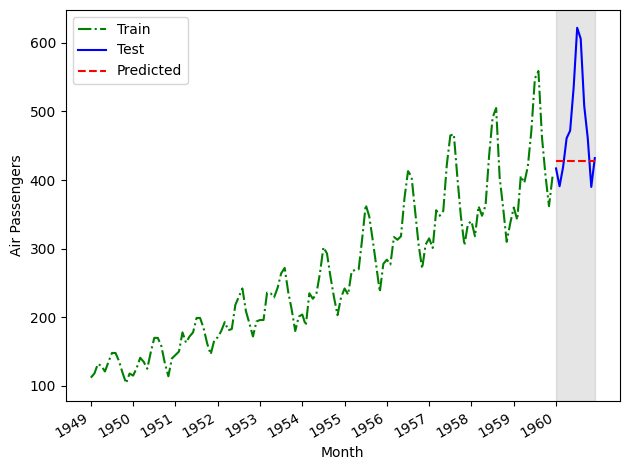

In [31]:

fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Air Passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 144, 12), [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('020 - Naive Forecasting - image 030.png', dpi=300)


In [32]:
print("Mape: " + str(mape(test['Passengers'], test['pred_last_yr_mean'])))
print("Rsme: " + str(rsme(test['Passengers'], test['pred_last_yr_mean'])))

Mape: 12.055750606375332
Rsme: 88.47315977176355


# Naive seasonal forecast 

In [33]:
test.loc[:, 'pred_last_season'] = train['Passengers'][-12:].values
test

C:\Users\FAH\AppData\Local\Temp\ipykernel_29892\3129878348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['Passengers'][-12:].values


,Month,Passengers,pred_mean,pred_last_yr_mean,pred_last_season
132,1960-01,417,262.492424,428.333333,360
133,1960-02,391,262.492424,428.333333,342
134,1960-03,419,262.492424,428.333333,406
135,1960-04,461,262.492424,428.333333,396
136,1960-05,472,262.492424,428.333333,420
137,1960-06,535,262.492424,428.333333,472
138,1960-07,622,262.492424,428.333333,548
139,1960-08,606,262.492424,428.333333,559
140,1960-09,508,262.492424,428.333333,463
141,1960-10,461,262.492424,428.333333,407


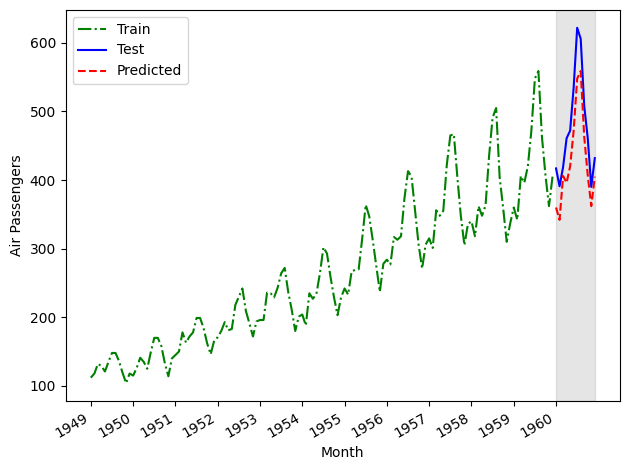

In [34]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Air Passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 144, 12), [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('020 - Naive Forecasting - image 040.png', dpi=300)


In [35]:
print("Mape: " + str(mape(test['Passengers'], test['pred_last_season'])))
print("Rsme: " + str(rsme(test['Passengers'], test['pred_last_season'])))

Mape: 9.987532920823485
Rsme: 50.708316214732804


In [36]:
test.loc[:, 'pred_last_season'] = train['Passengers'][-12:].values
test['Passengers Growth'] = test['pred_last_season'] * 1.1
test

C:\Users\FAH\AppData\Local\Temp\ipykernel_29892\1123365942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Passengers Growth'] = test['pred_last_season'] * 1.1


,Month,Passengers,pred_mean,pred_last_yr_mean,pred_last_season,Passengers Growth
132,1960-01,417,262.492424,428.333333,360,396.0
133,1960-02,391,262.492424,428.333333,342,376.2
134,1960-03,419,262.492424,428.333333,406,446.6
135,1960-04,461,262.492424,428.333333,396,435.6
136,1960-05,472,262.492424,428.333333,420,462.0
137,1960-06,535,262.492424,428.333333,472,519.2
138,1960-07,622,262.492424,428.333333,548,602.8
139,1960-08,606,262.492424,428.333333,559,614.9
140,1960-09,508,262.492424,428.333333,463,509.3
141,1960-10,461,262.492424,428.333333,407,447.7


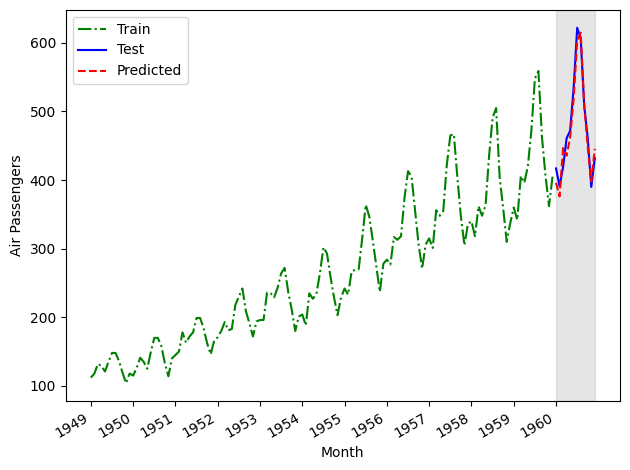

In [39]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['Passengers Growth'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Air Passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 144, 12), [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('020 - Naive Forecasting - image 040.png', dpi=300)


In [44]:
print("Mape: " + str(mape(test['Passengers'], test['Passengers Growth'])))
print("Rsme: " + str(rsme(test['Passengers'], test['Passengers Growth'])))

Mape: 3.2428243213890497
Rsme: 16.564319082493736


In [41]:
# create a new datframe based on the data dataframe. Change the Frequency to yeary. Calculate the growth rate of the passengers for each year, compared to the previous year.
# Convert 'Month' to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as the index
data.set_index('Month', inplace=True)

# Resample the data to yearly frequency, summing up the passengers for each year
yearly_data = data.resample('Y').sum()

# Calculate the growth rate of passengers for each year compared to the previous year
yearly_data['Growth Rate'] = yearly_data['Passengers'].pct_change() * 100

yearly_data.reset_index(inplace=True)
yearly_data


C:\Users\FAH\AppData\Local\Temp\ipykernel_29892\1832913396.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').sum()


,Month,Passengers,Growth Rate
0,1949-12-31,1520,NaN
1,1950-12-31,1676,10.263158
2,1951-12-31,2042,21.837709
3,1952-12-31,2364,15.768854
4,1953-12-31,2700,14.213198
5,1954-12-31,2867,6.185185
6,1955-12-31,3408,18.869899
7,1956-12-31,3939,15.580986
8,1957-12-31,4421,12.236608
9,1958-12-31,4572,3.415517


In [43]:
average_growth_rate = yearly_data['Growth Rate'].mean()
average_growth_rate


np.float64(12.905625098267054)